# 1. tensorflow v2.x에서 v1 버전 사용하기

In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
# v1로 사용하기 

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
# tensor = data (상수, 변수), 연산
node1 = tf.constant('Hello,Tensorflow') # node1은 'tensor변수'  #'Hello,Tensorflow'라는 '상수값'이 있음  (node1상수 tensor선언)
#graph(computational graph를 생성)
sess = tf.Session()
#print(node1)   이렇게x
print(sess.run(node1))  #graph를 정의하고, graph를 메모리에 생성시키고, 구동해서 가져옴 
                        #b가 의미하는 것은 byte literals
print(sess.run(node1).decode())

b'Hello,Tensorflow'
Hello,Tensorflow


In [9]:
# 간단한 수학 연산 수행(computational graph)
node1 = tf.constant(10, dtype=tf.float32)  #int형태가 별로면 특정형태 지정 dtype=tf.float32
node2 = tf.constant(20, dtype=tf.float32)
#node3 = node1 + node2
node3 = tf.add(node1,node2)
# computational graph 실행 
sess = tf.Session()
print(sess.run( [node1,node2,node3]))

[10.0, 20.0, 30.0]


## Tensorflow
- tensorflow는 ML을 위해
<ol>
    <li> 그래프 정의 </li>
    <li>sess = tf.Session()를 실행</li>
    <li>sess.run()을 통해 값을 확인할 수 있음</li>

In [12]:
import numpy as np
node1 = tf.constant(np.array([1,2,3]),dtype=tf.int16)
node2 = tf.cast(node1, dtype=tf.float32)
sess = tf.Session()
print(sess.run(node1)) #int 16
print(sess.run(node2)) #float 32

[1 2 3]
[1. 2. 3.]


In [13]:
data = [1.,2.,3.,4.]
m = tf.reduce_mean(data)  #reduce_mean 평균값 연산  
sess= tf.Session()
print(sess.run(m))

2.5


# 2. tensorflow v1을 이용한 linear regression을 구현
- cost값을 줄이는 방향으로 
- c0st = 거리의 제곱 / 갯수

## 독립변수 x가 한 개 

In [24]:
# tensor graph 정의

# train data set
#x = np.array([1,2,3])
#y = np.array([1,2,3])
x=[1,2,3]
y=[1,2,3]

# weight & Bias (처음에는 랜덤값을 셋팅했다가 학습과정에서 변경)
W = tf.Variable(-100.0, name="weight")   # -1부터1 사이의 random 값  #-100.0  float형식으로 해야 에러안남
b = tf.Variable(tf.random.normal([1]), name="bias")

#hypothesis
H = W*x + b

# cost function(최소제곱법)
cost = tf.reduce_mean(tf.square(H-y))

# 우리의 목적으 cost 함수가 최소가 되는 w와 b를 찾는 것 
"""
cost함수는 제곱의 평균인 2차 함수이므로 곡선, 곡선위의 미분값이 줄어드는 방향으로 학습 
"""
#tensorflow1에서는 꼭 이런 방법
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)  #얼마씩 줄여나갈지
train = optimizer.minimize(cost)   #점점 cost가 줄어가는 방향으로 

# Session
sess =tf.Session()

# Variable 노드 초기화
sess.run(tf.global_variables_initializer())     #노드 초기화 왜필요한지? 앞에 node1,2있어서 그런건지???????????????????

#학습(tensorflow v2. fit()함수)
""" 
for step in range(1,6001):  #6000번 돌림 
    sess.run(train)
    if step%300 == 0:
        print("{}번째 cost:{}, W값:{},b값:{}".format(step,
                        sess.run(cost),sess.run(W), sess.run(b)))
"""

for step in range(1,4001):  #4000번 학습 
    W_val,b_val = sess.run([W,b])  #train을 실행하지 않으면 원래 초기값나옴, 실행을하면 cost가 점점 줄어들어 
    print("{}번째 cost:{}, W값:{},b값:{}".format(step,cost_val,W_val,b_val[0]))  #cost 최소제곱, W는 weight  b는bias
    sess.run(train)
        #_,cost_val,W_val, b_val = sess.run([train,cost,W,b]) #train은 필요없어서 _로   여기 안에 데이터 없음
    #if step%200 ==0:

1번째 cost:1.332346472732171e-11, W값:-100.0,b값:-1.1560523509979248
2번째 cost:1.332346472732171e-11, W값:-90.52709197998047,b값:2.907068967819214
3번째 cost:1.332346472732171e-11, W값:-82.10084533691406,b값:6.510011672973633
4번째 cost:1.332346472732171e-11, W값:-74.60516357421875,b값:9.703845024108887
5번째 cost:1.332346472732171e-11, W값:-67.93683624267578,b값:12.533974647521973
6번째 cost:1.332346472732171e-11, W값:-62.00408935546875,b값:15.04076862335205
7번째 cost:1.332346472732171e-11, W값:-56.725337982177734,b값:17.260116577148438
8번째 cost:1.332346472732171e-11, W값:-52.028045654296875,b값:19.223928451538086
9번째 cost:1.332346472732171e-11, W값:-47.84771728515625,b값:20.9605712890625
10번째 cost:1.332346472732171e-11, W값:-44.127017974853516,b값:22.495267868041992
11번째 cost:1.332346472732171e-11, W값:-40.814971923828125,b값:23.85044288635254
12번째 cost:1.332346472732171e-11, W값:-37.86625671386719,b값:25.046031951904297
13번째 cost:1.332346472732171e-11, W값:-35.24058151245117,b값:26.099761962890625
14번째 cost:1.3323464727

353번째 cost:1.332346472732171e-11, W값:-5.8362860679626465,b값:15.540484428405762
354번째 cost:1.332346472732171e-11, W값:-5.819851875305176,b값:15.50312614440918
355번째 cost:1.332346472732171e-11, W값:-5.803457260131836,b값:15.46585750579834
356번째 cost:1.332346472732171e-11, W값:-5.787102222442627,b값:15.428678512573242
357번째 cost:1.332346472732171e-11, W값:-5.770786285400391,b값:15.391589164733887
358번째 cost:1.332346472732171e-11, W값:-5.754509925842285,b값:15.354588508605957
359번째 cost:1.332346472732171e-11, W값:-5.738272666931152,b값:15.31767749786377
360번째 cost:1.332346472732171e-11, W값:-5.722074508666992,b값:15.280855178833008
361번째 cost:1.332346472732171e-11, W값:-5.7059149742126465,b값:15.244120597839355
362번째 cost:1.332346472732171e-11, W값:-5.689794540405273,b값:15.207474708557129
363번째 cost:1.332346472732171e-11, W값:-5.673712730407715,b값:15.170916557312012
364번째 cost:1.332346472732171e-11, W값:-5.657669544219971,b값:15.13444709777832
365번째 cost:1.332346472732171e-11, W값:-5.641664981842041,b값:15.0980

718번째 cost:1.332346472732171e-11, W값:-1.8398557901382446,b값:6.455659866333008
719번째 cost:1.332346472732171e-11, W값:-1.83302903175354,b값:6.440140724182129
720번째 cost:1.332346472732171e-11, W값:-1.826218605041504,b값:6.424659252166748
721번째 cost:1.332346472732171e-11, W값:-1.8194246292114258,b값:6.409214973449707
722번째 cost:1.332346472732171e-11, W값:-1.8126469850540161,b값:6.393807888031006
723번째 cost:1.332346472732171e-11, W값:-1.8058855533599854,b값:6.378437519073486
724번째 cost:1.332346472732171e-11, W값:-1.799140453338623,b값:6.363104343414307
725번째 cost:1.332346472732171e-11, W값:-1.7924115657806396,b값:6.347807884216309
726번째 cost:1.332346472732171e-11, W값:-1.7856987714767456,b값:6.332548141479492
727번째 cost:1.332346472732171e-11, W값:-1.7790021896362305,b값:6.317325115203857
728번째 cost:1.332346472732171e-11, W값:-1.7723217010498047,b값:6.302138805389404
729번째 cost:1.332346472732171e-11, W값:-1.7656571865081787,b값:6.286988735198975
730번째 cost:1.332346472732171e-11, W값:-1.759008765220642,b값:6.2718753

1126번째 cost:1.332346472732171e-11, W값:-0.06371606886386871,b값:2.418076515197754
1127번째 cost:1.332346472732171e-11, W값:-0.06115896254777908,b값:2.4122636318206787
1128번째 cost:1.332346472732171e-11, W값:-0.058608002960681915,b값:2.4064648151397705
1129번째 cost:1.332346472732171e-11, W값:-0.05606318265199661,b값:2.40067982673645
1130번째 cost:1.332346472732171e-11, W값:-0.053524479269981384,b값:2.3949086666107178
1131번째 cost:1.332346472732171e-11, W값:-0.05099187418818474,b값:2.3891515731811523
1132번째 cost:1.332346472732171e-11, W값:-0.048465363681316376,b값:2.383408308029175
1133번째 cost:1.332346472732171e-11, W값:-0.0459449328482151,b값:2.377678871154785
1134번째 cost:1.332346472732171e-11, W값:-0.04343055933713913,b값:2.3719630241394043
1135번째 cost:1.332346472732171e-11, W값:-0.04092222824692726,b값:2.3662610054016113
1136번째 cost:1.332346472732171e-11, W값:-0.038419924676418304,b값:2.360572576522827
1137번째 cost:1.332346472732171e-11, W값:-0.035923633724451065,b값:2.354897975921631
1138번째 cost:1.332346472732171e-

1512번째 cost:1.332346472732171e-11, W값:0.5799013376235962,b값:0.9549830555915833
1513번째 cost:1.332346472732171e-11, W값:0.5809112191200256,b값:0.9526873230934143
1514번째 cost:1.332346472732171e-11, W값:0.5819186568260193,b값:0.9503971338272095
1515번째 cost:1.332346472732171e-11, W값:0.5829237103462219,b값:0.948112428188324
1516번째 cost:1.332346472732171e-11, W값:0.5839263200759888,b값:0.9458332061767578
1517번째 cost:1.332346472732171e-11, W값:0.5849265456199646,b값:0.943559467792511
1518번째 cost:1.332346472732171e-11, W값:0.5859243869781494,b값:0.9412912130355835
1519번째 cost:1.332346472732171e-11, W값:0.5869197845458984,b값:0.9390284419059753
1520번째 cost:1.332346472732171e-11, W값:0.5879127979278564,b값:0.9367710947990417
1521번째 cost:1.332346472732171e-11, W값:0.5889034271240234,b값:0.9345191717147827
1522번째 cost:1.332346472732171e-11, W값:0.5898916721343994,b값:0.9322726726531982
1523번째 cost:1.332346472732171e-11, W값:0.5908775329589844,b값:0.9300315380096436
1524번째 cost:1.332346472732171e-11, W값:0.59186100959777

1898번째 cost:1.332346472732171e-11, W값:0.8340885639190674,b값:0.3771556317806244
1899번째 cost:1.332346472732171e-11, W값:0.8344873785972595,b값:0.3762489855289459
1900번째 cost:1.332346472732171e-11, W값:0.8348852396011353,b값:0.37534451484680176
1901번째 cost:1.332346472732171e-11, W값:0.8352821469306946,b값:0.3744422197341919
1902번째 cost:1.332346472732171e-11, W값:0.8356781005859375,b값:0.37354210019111633
1903번째 cost:1.332346472732171e-11, W값:0.836073100566864,b값:0.3726441264152527
1904번째 cost:1.332346472732171e-11, W값:0.8364672064781189,b값:0.37174832820892334
1905번째 cost:1.332346472732171e-11, W값:0.8368603587150574,b값:0.3708546757698059
1906번째 cost:1.332346472732171e-11, W값:0.8372525572776794,b값:0.3699631690979004
1907번째 cost:1.332346472732171e-11, W값:0.8376438021659851,b값:0.3690738081932068
1908번째 cost:1.332346472732171e-11, W값:0.8380340933799744,b값:0.3681865930557251
1909번째 cost:1.332346472732171e-11, W값:0.8384234309196472,b값:0.36730149388313293
1910번째 cost:1.332346472732171e-11, W값:0.838811874

2278번째 cost:1.332346472732171e-11, W값:0.9335227608680725,b값:0.1511184424161911
2279번째 cost:1.332346472732171e-11, W값:0.9336825609207153,b값:0.1507551670074463
2280번째 cost:1.332346472732171e-11, W값:0.9338420033454895,b값:0.15039275586605072
2281번째 cost:1.332346472732171e-11, W값:0.9340010285377502,b값:0.1500312238931656
2282번째 cost:1.332346472732171e-11, W값:0.9341596961021423,b값:0.1496705561876297
2283번째 cost:1.332346472732171e-11, W값:0.934317946434021,b값:0.14931075274944305
2284번째 cost:1.332346472732171e-11, W값:0.934475839138031,b값:0.14895181357860565
2285번째 cost:1.332346472732171e-11, W값:0.9346333742141724,b값:0.1485937386751175
2286번째 cost:1.332346472732171e-11, W값:0.9347904920578003,b값:0.14823652803897858
2287번째 cost:1.332346472732171e-11, W값:0.9349472522735596,b값:0.1478801816701889
2288번째 cost:1.332346472732171e-11, W값:0.9351036548614502,b값:0.14752468466758728
2289번째 cost:1.332346472732171e-11, W값:0.9352596402168274,b값:0.1471700519323349
2290번째 cost:1.332346472732171e-11, W값:0.935415267

2655번째 cost:1.332346472732171e-11, W값:0.9731709361076355,b값:0.06098880246281624
2656번째 cost:1.332346472732171e-11, W값:0.9732354283332825,b값:0.06084218993782997
2657번째 cost:1.332346472732171e-11, W값:0.9732997417449951,b값:0.06069592759013176
2658번째 cost:1.332346472732171e-11, W값:0.9733639359474182,b값:0.0605500191450119
2659번째 cost:1.332346472732171e-11, W값:0.973427951335907,b값:0.0604044608771801
2660번째 cost:1.332346472732171e-11, W값:0.9734918475151062,b값:0.06025925278663635
2661번째 cost:1.332346472732171e-11, W값:0.9735555648803711,b값:0.06011439487338066
2662번째 cost:1.332346472732171e-11, W값:0.9736191630363464,b값:0.059969883412122726
2663번째 cost:1.332346472732171e-11, W값:0.9736825823783875,b값:0.05982571840286255
2664번째 cost:1.332346472732171e-11, W값:0.9737458229064941,b값:0.05968189984560013
2665번째 cost:1.332346472732171e-11, W값:0.9738089442253113,b값:0.059538427740335464
2666번째 cost:1.332346472732171e-11, W값:0.9738718867301941,b값:0.05939530208706856
2667번째 cost:1.332346472732171e-11, W값:0.9

3016번째 cost:1.332346472732171e-11, W값:0.9887471199035645,b값:0.02558031491935253
3017번째 cost:1.332346472732171e-11, W값:0.9887741804122925,b값:0.02551882341504097
3018번째 cost:1.332346472732171e-11, W값:0.9888011813163757,b값:0.025457480922341347
3019번째 cost:1.332346472732171e-11, W값:0.9888281226158142,b값:0.025396283715963364
3020번째 cost:1.332346472732171e-11, W값:0.9888550043106079,b값:0.02533523365855217
3021번째 cost:1.332346472732171e-11, W값:0.9888817667961121,b값:0.025274328887462616
3022번째 cost:1.332346472732171e-11, W값:0.9889084696769714,b값:0.02521357126533985
3023번째 cost:1.332346472732171e-11, W값:0.988935112953186,b값:0.025152960792183876
3024번째 cost:1.332346472732171e-11, W값:0.9889616966247559,b값:0.02509249560534954
3025번째 cost:1.332346472732171e-11, W값:0.9889882206916809,b값:0.025032177567481995
3026번째 cost:1.332346472732171e-11, W값:0.9890146851539612,b값:0.02497200481593609
3027번째 cost:1.332346472732171e-11, W값:0.9890410900115967,b값:0.024911977350711823
3028번째 cost:1.332346472732171e-11, 

3372번째 cost:1.332346472732171e-11, W값:0.9952232241630554,b값:0.01085887011140585
3373번째 cost:1.332346472732171e-11, W값:0.9952347278594971,b값:0.010832764208316803
3374번째 cost:1.332346472732171e-11, W값:0.995246171951294,b값:0.010806719772517681
3375번째 cost:1.332346472732171e-11, W값:0.9952576160430908,b값:0.010780738666653633
3376번째 cost:1.332346472732171e-11, W값:0.9952690005302429,b값:0.01075481902807951
3377번째 cost:1.332346472732171e-11, W값:0.995280385017395,b값:0.01072896271944046
3378번째 cost:1.332346472732171e-11, W값:0.9952917098999023,b값:0.01070316694676876
3379번째 cost:1.332346472732171e-11, W값:0.9953030347824097,b값:0.01067743543535471
3380번째 cost:1.332346472732171e-11, W값:0.9953143000602722,b값:0.010651766322553158
3381번째 cost:1.332346472732171e-11, W값:0.9953255653381348,b값:0.010626159608364105
3382번째 cost:1.332346472732171e-11, W값:0.9953367710113525,b값:0.010600613430142403
3383번째 cost:1.332346472732171e-11, W값:0.9953479766845703,b값:0.010575130581855774
3384번째 cost:1.332346472732171e-11, 

3718번째 cost:1.332346472732171e-11, W값:0.9979227781295776,b값:0.004721929784864187
3719번째 cost:1.332346472732171e-11, W값:0.9979277849197388,b값:0.004710580687969923
3720번째 cost:1.332346472732171e-11, W값:0.9979327917098999,b값:0.004699256736785173
3721번째 cost:1.332346472732171e-11, W값:0.9979377388954163,b값:0.004687960725277662
3722번째 cost:1.332346472732171e-11, W값:0.9979426860809326,b값:0.004676691722124815
3723번째 cost:1.332346472732171e-11, W값:0.997947633266449,b값:0.004665450658649206
3724번째 cost:1.332346472732171e-11, W값:0.9979525804519653,b값:0.004654236603528261
3725번째 cost:1.332346472732171e-11, W값:0.9979575276374817,b값:0.004643047694116831
3726번째 cost:1.332346472732171e-11, W값:0.9979624152183533,b값:0.004631885327398777
3727번째 cost:1.332346472732171e-11, W값:0.9979673027992249,b값:0.004620751366019249
3728번째 cost:1.332346472732171e-11, W값:0.9979721903800964,b값:0.0046096439473330975
3729번째 cost:1.332346472732171e-11, W값:0.997977077960968,b값:0.004598564002662897
3730번째 cost:1.332346472732171

In [17]:
sess.run([W,b])

[array([1.0000044], dtype=float32), array([-8.861246e-06], dtype=float32)]

In [20]:
w_,b_ = sess.run([W,b])

In [21]:
print("최종적으로 나온 회귀식: H={}*x + {}".format(w_[0],b_[0]))   #w_[0]은 [1.0000044],

최종적으로 나온 회귀식: H=1.0000044107437134*x + -8.861245987645816e-06


## 2.1 predict를 하기 위한 placeholder노드
- node:  a basic unit of a data structure, such as a linked list or tree data structure.

In [25]:
#placeholder이용
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
#ab = tf.add(a+b)
ab = a+b
sess = tf.Session()
sess.run(ab,feed_dict={a:10,b:20})  #a,b에 수를 할당해주어야   ab=a+b이기때문

30.0

In [26]:
#sess.run(ab,feed_dict={a:[1,2,3],b:[10,10,10]})  #np로 바꿔서 넣어야 
sess.run(ab,feed_dict={a:np.array([1,2,3]),b:np.array([10,10,10])}) 

array([11., 12., 13.], dtype=float32)

In [27]:
#그래프 실행 단계에서 값을 던져줌 
node1 = tf.placeholder(tf.float32)
node2 = tf.placeholder(tf.float32)
adder_node = node1+ node2
sess = tf.Session()
result= sess.run(adder_node,feed_dict={node1:input("node1값은 "),
                                      node2: input("node2값은 ")})
print(result)

node1값은 10
node2값은 20
30.0


In [31]:
#training data set (H = 2x + 3)
x_data =[1,2,3]
y_data =[5,7,9]

# placeholder 설정       (a placeholder is a pre-formatted container into which content can be placed)
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

# weight & bias
W = tf.Variable(tf.random_normal([1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# Hypothesis
H = W*x + b

# cost function
cost = tf.reduce_mean(tf.square(H-y))

# 최소제곱법으로 cost를 줄이는 방향
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)  #경사하강법
train = optimizer.minimize(cost)

# Session & Variable 초기화         (W,b 다  Variable)  # 앞에는 단지 이런 그래프만들겠다 설정. 따라서 초기화하고 값이 들어감*** 
sess = tf.Session()  #메모리에 올라가 
sess.run(tf.global_variables_initializer())

#학습
for step in range(1, 6001):
    _, cost_val,W_val,b_val = sess.run([train,cost,W,b],
                                       feed_dict={x:x_data,y:y_data})
    if step%200 ==0:
        print("{}번째:cost-{},W-{},b-{}".format(step,cost_val,W_val,b_val))




200번째:cost-0.4444166123867035,W-[2.7724066],b-[1.2441384]
400번째:cost-0.16970010101795197,W-[2.4773006],b-[1.9149837]
600번째:cost-0.06479991227388382,W-[2.2949429],b-[2.3295262]
800번째:cost-0.024743707850575447,W-[2.1822567],b-[2.585688]
1000번째:cost-0.00944832619279623,W-[2.112623],b-[2.7439814]
1200번째:cost-0.0036077487748116255,W-[2.0695937],b-[2.8417974]
1400번째:cost-0.001377643900923431,W-[2.043005],b-[2.9022396]
1600번째:cost-0.0005260537727735937,W-[2.0265744],b-[2.93959]
1800번째:cost-0.00020085800497327,W-[2.016421],b-[2.962671]
2000번째:cost-7.669729529879987e-05,W-[2.0101469],b-[2.9769332]
2200번째:cost-2.9289780286489986e-05,W-[2.0062706],b-[2.9857454]
2400번째:cost-1.1186715710209683e-05,W-[2.0038755],b-[2.9911907]
2600번째:cost-4.2724709601316135e-06,W-[2.0023954],b-[2.9945555]
2800번째:cost-1.6333997336914763e-06,W-[2.0014813],b-[2.9966338]
3000번째:cost-6.250942874430621e-07,W-[2.0009165],b-[2.9979177]
3200번째:cost-2.400524010681693e-07,W-[2.0005674],b-[2.9987094]
3400번째:cost-9.21215033145017

In [32]:
sess.run([W,b])

[array([2.000026], dtype=float32), array([2.999942], dtype=float32)]

In [ ]:
# 예측해보기 (predict)
sess.run(H,feed_dict={x:5})         #H hypothesis


In [33]:
sess.run(H,feed_dict={x:np.array([1,10,20])})

array([ 4.999968, 23.000202, 43.00046 ], dtype=float32)

## 2.2 scale이 다른 데이터들의 linear regression을 구현

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np 

In [36]:
#training data set (datadml scale이 다르면 학습 결과가?)
x_data = [1,2,5,8,10]
y_data =[5,15,68,80,95]

# placeholder를 설정
x= tf.placeholder(dtype=tf.float32, shape=None)  # shape=[2]   2열짜리가 들어올 예정   shape=None 다 들어올 수 있음
y= tf.placeholder(dtype=tf.float32, shape=None)

# weight & bias
W = tf.Variable(tf.random_normal([1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# Hypothesis
H = W*x + b

# cost function 
cost = tf.reduce_mean(tf.square(H-y))

# train 
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
# train = optimizer.minimize(cost)

# session & Variable 초기화 
sess = tf.Session()
sess.run(tf.global_variables_initializer())

#학습
for step in range(1,6001):
    _,cost_val,W_val = sess.run([train,cost,W],feed_dict={x:x_data, y:y_data})
    if step%200 == 0:
        print("{}번째 cost-{}, W-{}".format(step,cost_val,W_val))


200번째 cost-79.16698455810547, W-[10.119394]
400번째 cost-79.14200592041016, W-[10.147606]
600번째 cost-79.13968658447266, W-[10.156151]
800번째 cost-79.13947296142578, W-[10.158739]
1000번째 cost-79.13947296142578, W-[10.159523]
1200번째 cost-79.13945007324219, W-[10.15976]
1400번째 cost-79.13946533203125, W-[10.159832]
1600번째 cost-79.13944244384766, W-[10.159854]
1800번째 cost-79.13946533203125, W-[10.159861]
2000번째 cost-79.13947296142578, W-[10.159862]
2200번째 cost-79.13945770263672, W-[10.1598625]
2400번째 cost-79.13945770263672, W-[10.1598625]
2600번째 cost-79.13945770263672, W-[10.1598625]
2800번째 cost-79.13945770263672, W-[10.1598625]
3000번째 cost-79.13945770263672, W-[10.1598625]
3200번째 cost-79.13945770263672, W-[10.1598625]
3400번째 cost-79.13945770263672, W-[10.1598625]
3600번째 cost-79.13945770263672, W-[10.1598625]
3800번째 cost-79.13945770263672, W-[10.1598625]
4000번째 cost-79.13945770263672, W-[10.1598625]
4200번째 cost-79.13945770263672, W-[10.1598625]
4400번째 cost-79.13945770263672, W-[10.1598625]
460

In [37]:
sess.run([W,b])

[array([10.1598625], dtype=float32), array([-0.23128414], dtype=float32)]

In [39]:
# 예측을 할 수 있으나 cost가 너무 큰 값이라 믿을 수 없음
sess.run(H,feed_dict={x:10})

array([101.36734], dtype=float32)

- **예측이 제대로 안되는 이유: GradientDescentOptimizer에서 Local최속밧을 만나면**
- **global 최소값이 따로 있어도 멈춤** 

# 3. 독립변수x가 여러 개인 linear regression
- scales이 다른 x,y값

In [44]:
# training data set
x_data = np.array([ [73,80,75],
                    [93,88,93],
                    [89,91,90],
                    [96,98,100],
                    [73,66,70]])
y_data = np.array([ [152],
                  [185],
                  [180],
                  [196],
                  [142]])

#x_data =[ [73,80,75],       #ctrl+ /  하면 전체 주석처리 
#           [93,88,93,185],
#           [89,91,90],
#           [96,98,100,196],
#           [73,66,70]]
#y_data = [ [152],[185],[180], [196], [142]]


# placeholder
X = tf.placeholder(shape=[None,3], dtype=tf.float32) #몇 줄인지 모르지만 3열은 들어가 
Y = tf.placeholder(shape=[None,1], dtype=tf.float32)

# weight & bias
W = tf.Variable(tf.random_normal([3,1]), name="weight")  #3행1열짜리
b = tf.Variable(tf.random_normal([1]), name="bias")

# Hypothesis
#H = X@W + b  #행렬의 곱
H = tf.matmul(X,W) + b

# cost function
cost = tf.reduce_mean(tf.square(H-Y))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)  #1e-2        ==> 1의 10의 -2승  따라서 0.01

# session & Variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(1, 60001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data, 
                                                    Y : y_data})
    if step%3000 == 0 :
        print("{}번째 cost:{}".format(step, cost_val))

3000번째 cost:8.7174654006958
6000번째 cost:2.0346901416778564
9000번째 cost:0.7034474611282349
12000번째 cost:0.42719897627830505
15000번째 cost:0.3604367673397064
18000번째 cost:0.3365382254123688
21000번째 cost:0.32257986068725586
24000번째 cost:0.31179946660995483
27000번째 cost:0.30273643136024475
30000번째 cost:0.29491546750068665
33000번째 cost:0.28815096616744995
36000번째 cost:0.28230196237564087
39000번째 cost:0.2772652208805084
42000번째 cost:0.2729179263114929
45000번째 cost:0.26914000511169434
48000번째 cost:0.26586586236953735
51000번째 cost:0.26302388310432434
54000번째 cost:0.2605466842651367
57000번째 cost:0.25839942693710327
60000번째 cost:0.2565256655216217


# 4. Ozone량 예측 예제
- 독립변수 x가 3 => Multi varaible Linear Regression

In [45]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import pandas as pd

In [62]:
# training data set 생성
# data load -> 결측치 처리 -> 독립변수, 종속변수 분리 
data = pd.read_csv('./data/ozone.csv', sep=",") #영어만 있을때 encoding따로 지정할 필요없다


# data를 바로 학습할 수 없음. 데이터 정제 작업 필요. 
data = data.dropna(how='any') # 결측치가 한 열이라도 있는 행 모두 제거    
                                # how='any': If any NA values are present, drop that row or column.
data   # display(data)하면 밑에 다른것 또 써도 그대로 data출력

# 필요한 columns만 추출
data = data[ ['Ozone','Solar.R','Wind','Temp'] ]
data.head()

# training data set
x_data = data[ ['Solar.R','Wind','Temp' ] ]. values  #DataFrame을 numpy 배열로                   
y_data = data[['Ozone']].values   # []하나 더 감싸야 dataframe으로 들어옴 . 111행 1열로 잡힙  
                                #y_data = data[['Ozone']].values.reshape(-1,1) 여기서 -1은 몇 행인지 모르겠으나 열은 1열로 하겠다 
x_data.shape, y_data.shape

# tensorflow구현
# 1.placeholder
X = tf.placeholder(shape=[None,3], dtype=tf.float32)
Y = tf.placeholder(shape=[None,1], dtype=tf.float32)

# 2. Weight & bias 설정
W = tf.Variable(tf.random_normal([3,1]), name="weight")  #3행1열
b = tf.Variable(tf.random_normal([1]), name ="bias")

# 3. Hypothesis
H = X@W + b
#H = tf.matmul(X,W) + b 

# 4. cost함수
cost = tf.reduce_mean(tf.square(H-Y))

# 5.train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

# 6. session & 초기화 
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 7. 학습
for step in range(1,60001):
    _,cost_val = sess.run([train,cost], feed_dict={X:x_data,
                                                  Y:y_data})
    if step%3000 == 0:
        print("{}번째 cost{}".format(step,cost_val))






3000번째 cost518.7888793945312
6000번째 cost471.24188232421875
9000번째 cost465.64752197265625
12000번째 cost464.96624755859375
15000번째 cost464.8603820800781
18000번째 cost464.8218994140625
21000번째 cost464.7912902832031
24000번째 cost464.7617492675781
27000번째 cost464.7323303222656
30000번째 cost464.7029113769531
33000번째 cost464.6735534667969
36000번째 cost464.64422607421875
39000번째 cost464.61474609375
42000번째 cost464.58544921875
45000번째 cost464.55615234375
48000번째 cost464.5268249511719
51000번째 cost464.4974670410156
54000번째 cost464.46832275390625
57000번째 cost464.43914794921875
60000번째 cost464.4100036621094


In [56]:
type(data['Ozone']) #sidenote

pandas.core.series.Series

- **[]하나 더 감싸야 dataframe으로 들어옴 .  111행 1열로 잡힙**

In [59]:
type(data[['Ozone']])  #sidenote

pandas.core.frame.DataFrame

In [65]:
data[1:2]

,Ozone,Solar.R,Wind,Temp
1,36.0,118.0,8.0,72


In [67]:
sess.run(H, feed_dict= {X:np.array ([[118,8,72]])})   #[] 한번 더 감싸야

array([[41.63817]], dtype=float32)

###   **scale 조정(standardization)**   
<pre>
                       x - Xmean(평균)
 standardization = ────────────────
                       Xstd(표준편차)

In [68]:
# scale 맞추는 방법: normalization (많이 씀), standardization (표준화)
#
#                    X - Xmin
# normalization = ──────────────
#                    Xmax - Xmin
#            위의 식을 써도되지만 라이브러리를 씀 (sklearn.preprocessing.MinMaxScaler 이용)
#
#                    x - Xmean(평균)
# standardization = ────────────────
#                     Xstd(표준편차)
#            위의 식을 써도되지만 라이브러리를 씀 (sklearn.preprocessing.StandardScaler 이용)

-  **scale 조정(standardization)**   


In [70]:
# training data set 생성
# data load -> 결측치 처리 -> 독립변수, 종속변수 분리 
data = pd.read_csv('./data/ozone.csv', sep=",") #영어만 있을때 encoding따로 지정할 필요없다


# data를 바로 학습할 수 없음. 데이터 정제 작업 필요. 
data = data.dropna(how='any') # 결측치가 한 열이라도 있는 행 모두 제거    
                                # how='any': If any NA values are present, drop that row or column.
data   # display(data)하면 밑에 다른것 또 써도 그대로 data출력

# 필요한 columns만 추출
data = data[ ['Ozone','Solar.R','Wind','Temp'] ]


# scale 조정(standardization)   ********************8
#
#                    x - Xmean(평균)
# standardization = ────────────────
#                     Xstd(표준편차)

data['Ozone'] = ( data['Ozone'] - data['Ozone'].mean()) / data['Ozone'].std()
data['Solar.R'] = ( data['Solar.R'] - data['Solar.R'].mean()) / data['Solar.R'].std()
data['Wind'] = ( data['Wind'] - data['Wind'].mean()) / data['Wind'].std()
data['Temp'] = ( data['Temp'] - data['Temp'].mean()) / data['Temp'].std()

                                     
# training data set
x_data = data[ ['Solar.R','Wind','Temp' ] ]. values  #DataFrame을 numpy 배열로                   
y_data = data[['Ozone']].values   # []하나 더 감싸야 dataframe으로 들어옴 . 111행 1열로 잡힙  
                                #y_data = data[['Ozone']].values.reshape(-1,1) 여기서 -1은 몇 행인지 모르겠으나 열은 1열로 하겠다 
x_data.shape, y_data.shape

# tensorflow구현
# 1.placeholder
X = tf.placeholder(shape=[None,3], dtype=tf.float32)
Y = tf.placeholder(shape=[None,1], dtype=tf.float32)

# 2. Weight & bias 설정
W = tf.Variable(tf.random_normal([3,1]), name="weight")  #3행1열
b = tf.Variable(tf.random_normal([1]), name ="bias")

# 3. Hypothesis
H = X@W + b
#H = tf.matmul(X,W) + b 

# 4. cost함수
cost = tf.reduce_mean(tf.square(H-Y))

# 5.train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

# 6. session & 초기화 
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 7. 학습
for step in range(1,60001):
    _,cost_val = sess.run([train,cost], feed_dict={X:x_data,
                                                  Y:y_data})
    if step%3000 == 0:
        print("{}번째 cost{}".format(step,cost_val))


3000번째 cost8.203523635864258
6000번째 cost6.998692512512207
9000번째 cost5.992448329925537
12000번째 cost5.150970935821533
15000번째 cost4.446319580078125
18000번째 cost3.8553481101989746
21000번째 cost3.3589348793029785
24000번째 cost2.9412193298339844
27000번째 cost2.589076519012451
30000번째 cost2.2916290760040283
33000번째 cost2.0398542881011963
36000번째 cost1.8262596130371094
39000번째 cost1.6446282863616943
42000번째 cost1.489790439605713
45000번째 cost1.3574507236480713
48000번째 cost1.2440284490585327
51000번째 cost1.1465426683425903
54000번째 cost1.0625046491622925
57000번째 cost0.9898382425308228
60000번째 cost0.9268075823783875


In [ ]:
# predict 하려면 
sess.run(H,feed_dict={x:})

### 식 대신 open library이용

In [73]:
# data를 바로 학습할 수 없음. 데이터 정제 작업 필요. 
data = data.dropna(how='any') # 결측치가 한 열이라도 있는 행 모두 제거    
                                # how='any': If any NA values are present, drop that row or column.
data   # display(data)하면 밑에 다른것 또 써도 그대로 data출력

# 필요한 columns만 추출
data = data[ ['Ozone','Solar.R','Wind','Temp'] ]
                                     
# training data set
x_data = data[ ['Solar.R','Wind','Temp' ] ]. values  #DataFrame을 numpy 배열로                   
y_data = data[['Ozone']].values.reshape(-1,1)  
                                #y_data = data[['Ozone']].values.reshape(-1,1) 여기서 -1은 몇 행인지 모르겠으나 열은 1열로 하겠다 
#dataframe을 numpy배열로 바꿈
    
    
    
print('scale 조정 전 데이터: \n',np.c_[x_data[:3], y_data[:3]])
# scale  조정(1) sklearn.preprocessing.MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scale_x = MinMaxScaler() #scale_x : x_data를 scale조정할 객체 
scale_x.fit(x_data)  #x_data에 대한 설정을 잡는 부분
scale_x.fit(x_data)
x_data = scale_x.transform(x_data) # scale조정된 x_data

scale_y = MinMaxScaler()
scale_y.fit(y_data)
y_data = scale_y.transform(y_data) # scale 조정된 y_data
print('scale 조정된 데이터:\n', np.c_[x_data[:3],y_data[:3]])





scale 조정 전 데이터: 
 [[ 0.05702761 -0.71384046 -1.13251078 -0.03302982]
 [-0.73285918 -0.5451928  -0.60785011 -0.1832884 ]
 [-0.39276904  0.74777257 -0.39798584 -0.90452961]]
scale 조정된 데이터:
 [[0.55963303 0.27717391 0.25       0.23952096]
 [0.33944954 0.30978261 0.375      0.20958084]
 [0.43425076 0.55978261 0.425      0.06586826]]


### sklearn.preprocessing.MinMaxScaler 이용
<pre>
                    X - Xmin
 normalization = ──────────────
                    Xmax - Xmin
            위의 식을 써도되지만 라이브러리를 씀 (sklearn.preprocessing.MinMaxScaler 이용)

In [74]:
# data를 바로 학습할 수 없음. 데이터 정제 작업 필요. 
data = data.dropna(how='any') # 결측치가 한 열이라도 있는 행 모두 제거    
                                # how='any': If any NA values are present, drop that row or column.
data   # display(data)하면 밑에 다른것 또 써도 그대로 data출력

# 필요한 columns만 추출
data = data[ ['Ozone','Solar.R','Wind','Temp'] ]
                                     
# training data set
x_data = data[ ['Solar.R','Wind','Temp' ] ]. values  #DataFrame을 numpy 배열로                   
y_data = data[['Ozone']].values.reshape(-1,1)  
                                #y_data = data[['Ozone']].values.reshape(-1,1) 여기서 -1은 몇 행인지 모르겠으나 열은 1열로 하겠다 
#dataframe을 numpy배열로 바꿈
    
    
    
print('scale 조정 전 데이터: \n',np.c_[x_data[:3], y_data[:3]])
# scale  조정(1) sklearn.preprocessing.MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scale_x = MinMaxScaler() #scale_x : x_data를 scale조정할 객체 
scale_x.fit(x_data)  #x_data에 대한 설정을 잡는 부분
scale_x.fit(x_data)
x_data = scale_x.transform(x_data) # scale조정된 x_data

scale_y = MinMaxScaler()
scale_y.fit(y_data)
y_data = scale_y.transform(y_data) # scale 조정된 y_data
print('scale 조정된 데이터:\n', np.c_[x_data[:3],y_data[:3]])


############################################################################################


# tensorflow구현
# 1.placeholder
X = tf.placeholder(shape=[None,3], dtype=tf.float32)
Y = tf.placeholder(shape=[None,1], dtype=tf.float32)

# 2. Weight & bias 설정
W = tf.Variable(tf.random_normal([3,1]), name="weight")  #3행1열
b = tf.Variable(tf.random_normal([1]), name ="bias")

# 3. Hypothesis
H = X@W + b
#H = tf.matmul(X,W) + b 

# 4. cost함수
cost = tf.reduce_mean(tf.square(H-Y))

# 5.train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

# 6. session & 초기화 
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 7. 학습
for step in range(1,60001):
    _,cost_val = sess.run([train,cost], feed_dict={X:x_data,
                                                  Y:y_data})
    if step%3000 == 0:
        print("{}번째 cost{}".format(step,cost_val))


scale 조정 전 데이터: 
 [[ 0.05702761 -0.71384046 -1.13251078 -0.03302982]
 [-0.73285918 -0.5451928  -0.60785011 -0.1832884 ]
 [-0.39276904  0.74777257 -0.39798584 -0.90452961]]
scale 조정된 데이터:
 [[0.55963303 0.27717391 0.25       0.23952096]
 [0.33944954 0.30978261 0.375      0.20958084]
 [0.43425076 0.55978261 0.425      0.06586826]]
3000번째 cost0.9507974982261658
6000번째 cost0.822647213935852
9000번째 cost0.7186325788497925
12000번째 cost0.6341511607170105
15000번째 cost0.5654760599136353
18000번째 cost0.5095993280410767
21000번째 cost0.46407249569892883
24000번째 cost0.4269382655620575
27000번째 cost0.39658239483833313
30000번째 cost0.3717311918735504
33000번째 cost0.3513205647468567
36000번째 cost0.3345088064670563
39000번째 cost0.3206217288970947
42000번째 cost0.3090875446796417
45000번째 cost0.2994706928730011
48000번째 cost0.2914077937602997
51000번째 cost0.28459760546684265
54000번째 cost0.2788027226924896
57000번째 cost0.2738345265388489
60000번째 cost0.2695431709289551


In [76]:
# 8. prediction
input_data = np.array([ [118., 8., 72.] ])

In [77]:
scale_input_data = scale_x.transform(input_data)
print("원 데이터:", input_data)
print('scale 조정된 데이터:', scale_input_data)

원 데이터: [[118.   8.  72.]]
scale 조정된 데이터: [[33.43661605  1.96202965 17.67376422]]


In [78]:
predict_value = sess.run(H, feed_dict={X:scale_input_data})
scale_y.inverse_transform(predict_value)

array([[218.74089]], dtype=float32)

### **sklearn.preprocessing.StandardScaler 이용**
<pre>
                    x - Xmean(평균)
 standardization = ────────────────
                     Xstd(표준편차)
            위의 식을 써도되지만 라이브러리를 씀 (sklearn.preprocessing.StandardScaler 이용)

In [80]:
# data를 바로 학습할 수 없음. 데이터 정제 작업 필요. 
data = data.dropna(how='any') # 결측치가 한 열이라도 있는 행 모두 제거    
                                # how='any': If any NA values are present, drop that row or column.
data   # display(data)하면 밑에 다른것 또 써도 그대로 data출력

# 필요한 columns만 추출
data = data[ ['Ozone','Solar.R','Wind','Temp'] ]

# scale 조정: x_data, y_data scale을 따로 따로 하지 않고 --> data를 한꺼번에 scale 조정 시 prediction 어려움 
from sklearn. preprocessing import StandardScaler  #******************************************************8
scaler = StandardScaler()
scaler.fit(data)
data = pd.DataFrame(scaler.transform(data), columns=['Ozone','Solar.R','Wind','Temp' ])

############################################################################################
                                     
# training data set
x_data = data[ ['Solar.R','Wind','Temp' ] ]. values  #DataFrame을 numpy 배열로                   
y_data = data[['Ozone']].values.reshape(-1,1)  
                                #y_data = data[['Ozone']].values.reshape(-1,1) 여기서 -1은 몇 행인지 모르겠으나 열은 1열로 하겠다 
                                #dataframe을 numpy배열로 바꿈

# tensorflow구현
# 1.placeholder
X = tf.placeholder(shape=[None,3], dtype=tf.float32)
Y = tf.placeholder(shape=[None,1], dtype=tf.float32)

# 2. Weight & bias 설정
W = tf.Variable(tf.random_normal([3,1]), name="weight")  #3행1열
b = tf.Variable(tf.random_normal([1]), name ="bias")

# 3. Hypothesis
H = X@W + b
#H = tf.matmul(X,W) + b 

# 4. cost함수
cost = tf.reduce_mean(tf.square(H-Y))

# 5.train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

# 6. session & 초기화 
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 7. 학습
for step in range(1,60001):
    _,cost_val = sess.run([train,cost], feed_dict={X:x_data,
                                                  Y:y_data})
    if step%3000 == 0:
        print("{}번째 cost{}".format(step,cost_val))


3000번째 cost4.424646377563477
6000번째 cost3.8142263889312744
9000번째 cost3.302300214767456
12000번째 cost2.872307777404785
15000번째 cost2.510556697845459
18000번째 cost2.2057042121887207
21000번째 cost1.9483479261398315
24000번째 cost1.730682134628296
27000번째 cost1.5462476015090942
30000번째 cost1.3896414041519165
33000번째 cost1.2564098834991455
36000번째 cost1.1428135633468628
39000번째 cost1.0457556247711182
42000번째 cost0.9626388549804688
45000번째 cost0.8913065195083618
48000번째 cost0.8299455642700195
51000번째 cost0.7770397663116455
54000번째 cost0.7313191294670105
57000번째 cost0.6917190551757812
60000번째 cost0.6573379039764404


-  scale 조정: x_data, y_data scale을 따로 따로

In [82]:
# training data set 생성
# data load -> 결측치 처리 -> 독립변수, 종속변수 분리
data = pd.read_csv('./data/ozone.csv', sep=",")

# data를 바로 학습할 수 없음. 데이터 정제 작업 필요.
data = data.dropna(how='any') # 결측치가 한열이라도 있는 행 모두 제거

# 필요한 columns만 추출
data = data[['Ozone','Solar.R','Wind','Temp']]


# training data set
x_data = data[ ['Solar.R','Wind','Temp' ] ]. values  #DataFrame을 numpy 배열로                   
y_data = data[['Ozone']].values.reshape(-1,1)  
                                #y_data = data[['Ozone']].values.reshape(-1,1) 여기서 -1은 몇 행인지 모르겠으나 열은 1열로 하겠다 
                                #dataframe을 numpy배열로 바꿈

print('조정전\n', np.c_[x_data[:2], y_data[:2]])
        # scale 조정: x_data, y_data scale을 따로 따로 하지 않고 --> data를 한꺼번에 scale 조정 시 prediction 어려움 
from sklearn. preprocessing import StandardScaler  #******************************************************8
scaler_x = StandardScaler()
scaler_x.fit(x_data)
x_data = scaler_x.transform(x_data)

scaler_y = StandardScaler()
scaler_y.fit(y_data)
y_data = scaler_y.transform(y_data)
print('조정후\n', np.c_[x_data[:2], y_data[:2]])

############################################################################################
                                    
# tensorflow구현
# 1.placeholder
X = tf.placeholder(shape=[None,3], dtype=tf.float32)
Y = tf.placeholder(shape=[None,1], dtype=tf.float32)

# 2. Weight & bias 설정
W = tf.Variable(tf.random_normal([3,1]), name="weight")  #3행1열
b = tf.Variable(tf.random_normal([1]), name ="bias")

# 3. Hypothesis
H = X@W + b
#H = tf.matmul(X,W) + b 

# 4. cost함수
cost = tf.reduce_mean(tf.square(H-Y))

# 5.train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

# 6. session & 초기화 
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 7. 학습
for step in range(1,60001):
    _,cost_val = sess.run([train,cost], feed_dict={X:x_data,
                                                  Y:y_data})
    if step%3000 == 0:
        print("{}번째 cost{}".format(step,cost_val))


조정전
 [[190.    7.4  67.   41. ]
 [118.    8.   72.   36. ]]
조정후
 [[ 0.05728624 -0.71707784 -1.13764691 -0.03317961]
 [-0.73618283 -0.54766534 -0.61060682 -0.18411965]]
3000번째 cost4.298623085021973
6000번째 cost3.874305486679077
9000번째 cost3.503511428833008
12000번째 cost3.1787021160125732
15000번째 cost2.89347243309021
18000번째 cost2.6423966884613037
21000번째 cost2.4208531379699707
24000번째 cost2.2249107360839844
27000번째 cost2.0512070655822754
30000번째 cost1.8968640565872192
33000번째 cost1.7594282627105713
36000번째 cost1.6367663145065308
39000번째 cost1.527053952217102
42000번째 cost1.4287279844284058
45000번째 cost1.3404099941253662
48000번째 cost1.2609584331512451
51000번째 cost1.1893185377120972
54000번째 cost1.1246190071105957
57000번째 cost1.0660641193389893
60000번째 cost1.013002634048462


In [83]:
input_data = np.array( [ [118. , 8. , 72.] ])
scaled_input_data = scale_x.transform(input_data)
scaler_y.inverse_transform(sess.run(H, feed_dict = {X:scaled_input_data}))

array([[1022.4975]], dtype=float32)

In [84]:
sess.run([W,b])

[array([[0.26022178],
        [0.29704005],
        [1.169449  ]], dtype=float32),
 array([-0.3560268], dtype=float32)]

# 5. logistic Regression = Binary classification (2개 그룹)

w값은 0.12925170068027214 b값은 -0.27210884353741516


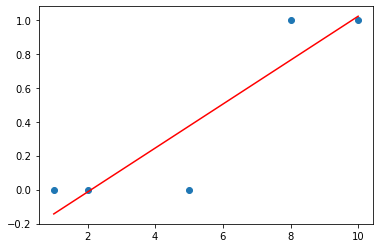

In [2]:
# Logistic Regression이 필요한 이유 (기존의 linear regression으로는 안 되는 이유)
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats    #휘귀식 도출 

x = np.array([1,2,5,8,10])
y = np.array([0,0,0,1,1])
lm = stats.linregress(x,y)
print('w값은', lm[0],'b값은',lm[1])
plt.scatter(x,y)
plt.plot(x,x*lm[0]+lm[1],'r') #휘귀식 

w값은 0.03500583430571762 b값은 0.1732788798133022


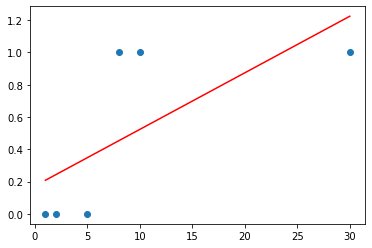

In [3]:
# Logistic Regression이 필요한 이유 (기존의 linear regression으로는 안 되는 이유)
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats    #휘귀식 도출 

x = np.array([1,2,5,8,10,30])
y = np.array([0,0,0,1,1,1])
lm = stats.linregress(x,y)
print('w값은', lm[0],'b값은',lm[1])
plt.scatter(x,y)
plt.plot(x,x*lm[0]+lm[1],'r') #휘귀식 

# 6. multinomial classification (3개 이상 그룹)